# Naive Bayes — Bernoulli
# Resample — SMOTE
### Import Libraries

conda install -c glemaitre imbalanced-learn 


conda update scikit-learn

In [9]:
from sklearn import __version__ 
print('The scikit-learn version is {}.'.format(__version__))

The scikit-learn version is 0.19.1.


In [10]:
import pandas as pd, numpy as np #basic package

from scipy import stats
from sklearn import preprocessing

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GMM

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, log_loss, confusion_matrix

from sklearn.utils import resample # resample

from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt


## Import Data and Define Global Variables

In [12]:
df = pd.read_csv("pp_df1.csv", index_col = 0)
df.head()

,diag_1,diag_2,diag_3,0,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,...,Yes,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_tran
0,250.0,434.952844,409.650469,0,0,0,1,0,0,1,...,0,1,41,0,1,0,0,0,1,0
1,276.0,250.000000,255.000000,0,0,0,1,0,0,1,...,1,3,59,0,18,0,0,0,9,0
2,648.0,250.000000,27.000000,0,1,0,0,0,0,1,...,1,2,11,5,13,2,0,1,6,0
3,8.0,250.000000,403.000000,0,0,0,1,0,0,0,...,1,2,44,1,16,0,0,0,7,0
4,197.0,157.000000,250.000000,0,0,0,1,0,0,0,...,1,1,51,0,8,0,0,0,5,0


In [17]:
df.columns

Index(['diag_1', 'diag_2', 'diag_3', '0', 'AfricanAmerican', 'Asian',
       'Caucasian', 'Hispanic', 'Other', 'Female',
       ...
       'Yes', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted_tran'],
      dtype='object', length=254)

In [27]:
df2 = df.iloc[:,4:]

In [28]:
df2.head()

,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,Unknown/Invalid,[0-10),[10-20),...,Yes,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_tran
0,0,0,1,0,0,1,0,0,1,0,...,0,1,41,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,1,...,1,3,59,0,18,0,0,0,9,0
2,1,0,0,0,0,1,0,0,0,0,...,1,2,11,5,13,2,0,1,6,0
3,0,0,1,0,0,0,1,0,0,0,...,1,2,44,1,16,0,0,0,7,0
4,0,0,1,0,0,0,1,0,0,0,...,1,1,51,0,8,0,0,0,5,0


In [29]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [30]:
len(df2.columns)

250

# Resample

In [31]:
pd.Series(y).value_counts()

0    90409
1    11357
Name: readmitted_tran, dtype: int64

# SMOTE

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [33]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [34]:
pd.Series(y_train).value_counts()

1    63304
0    63304
dtype: int64

In [35]:
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X_train)

plt.scatter(X.iloc[:,0], X.iloc[:, 1], s = 1)

centers = np.empty(shape=(gmm.n_components, X.shape[1]))

# Centroids

In [36]:
Centroids = pd.DataFrame(centers)

In [37]:
Centroids.columns = X.columns

In [41]:
Centroids

,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,Unknown/Invalid,[0-10),[10-20),...,No.17,Yes,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,0.0,0.0,1.0,0.0,0.0,0.367385,0.632615,0.0,0.0,0.0,...,0.367385,0.632615,5.367385,56.632615,2.367385,19.0,0.632615,0.0,0.632615,9.0
1,0.0,0.0,1.0,0.0,0.0,0.367385,0.632615,0.0,0.0,0.0,...,0.367385,0.632615,5.367385,56.632615,2.367385,19.0,0.632615,0.0,0.632615,9.0


### Save centroids to csv

Centroids.to_csv("Centroids_GMM_df2.csv")

In [39]:
for i in range(gmm.n_components):
    density = stats.multivariate_normal(cov=gmm.covariances_[i], mean=gmm.means_[i],  allow_singular=True).logpdf(X_train)
    centers[i, :] = X_train[np.argmax(density)]

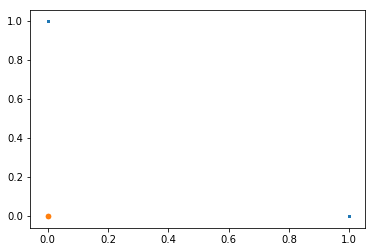

In [40]:
plt.scatter(centers[:, 0], centers[:, 1], s=20)
plt.show()